In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('UberDataset.csv')

In [3]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
df.shape

(1156, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


# DATA PREPROCESSING

In [7]:
df.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN


In [8]:
df['PURPOSE'].fillna('NOT',inplace=True)

C:\Users\LAKSHMIPRAVEENA\AppData\Local\Temp\ipykernel_25524\585564661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna('NOT',inplace=True)


In [9]:
df.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT


In [11]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors ='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors ='coerce')

In [12]:
df.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [14]:
from datetime import datetime
df['DATE']=pd.DatetimeIndex(df['START_DATE']).date

In [15]:
df.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02


In [16]:
df['TIME'] = pd.DatetimeIndex(df['START_DATE']).hour

In [17]:
df.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0


In [18]:
df['DAY/NIGHT']=pd.cut(x=df['TIME'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [19]:
df.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY/NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning


In [20]:
df.dropna(inplace = True)

In [21]:
df.shape

(413, 10)

# DATA VISUALISATION

<Axes: xlabel='count', ylabel='PURPOSE'>

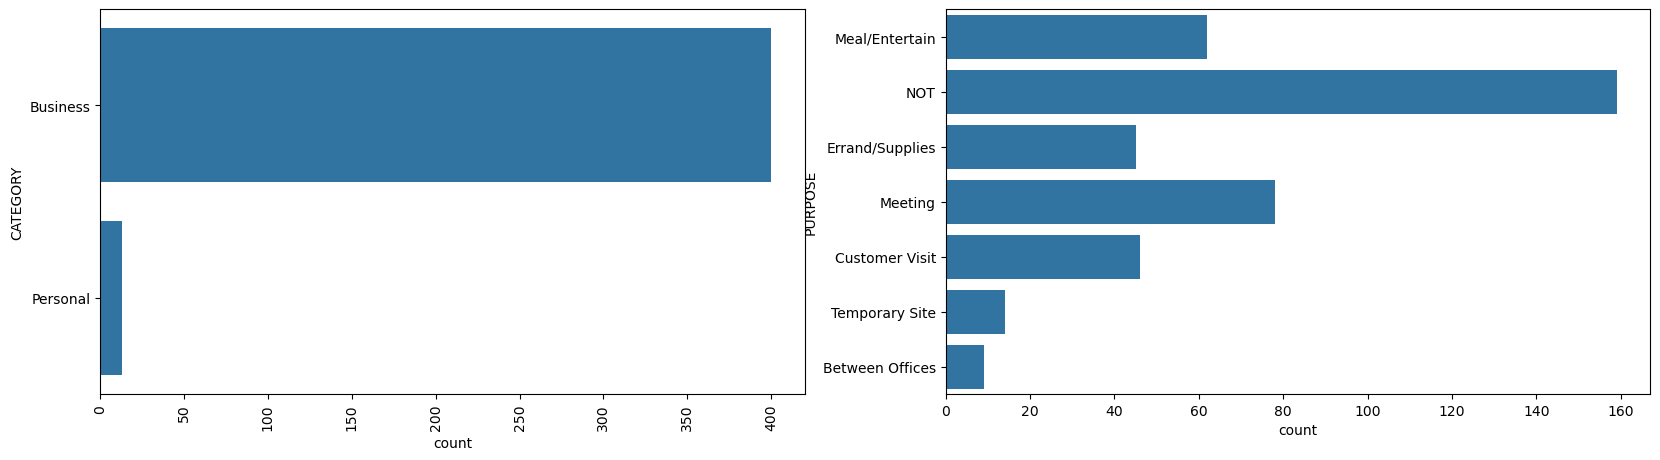

In [27]:
# IN WHICH CATEGORY DO PEOPLE BOOK THE MOST UBER RIDES
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])
plt.xticks(rotation = 90)
#FOR WHICH PURPOSE DO PEOPLE BOOK UBER RIDES THE MOST
plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])

<Axes: xlabel='count', ylabel='DAY/NIGHT'>

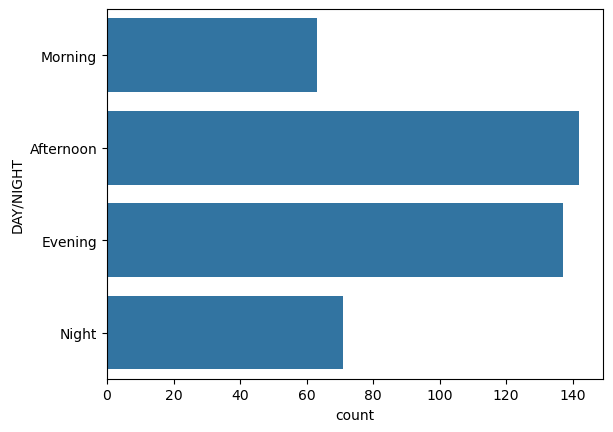

In [28]:
#AT WHAT TIME DID MOST UBER RIDES ARE BOOKED
sns.countplot(df['DAY/NIGHT'])


In [31]:
# Convert START_DATE to datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')

# Extract the month as a number (1 to 12)
df['MONTH_NUM'] = df['START_DATE'].dt.month

# Map month numbers to month names
month_label = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df['MONTH'] = df['MONTH_NUM'].map(month_label)

# Count the number of bookings per month
month_counts = df['MONTH'].value_counts().sort_index()

# Display months with the **least bookings**
least_months = month_counts[month_counts == month_counts.min()]
print(" Months with the least Uber bookings:")
print(least_months)


 Months with the least Uber bookings:
MONTH
Sep    13
Name: count, dtype: int64


In [32]:
df.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY/NIGHT,MONTH_NUM,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,1,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,1,Jan


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

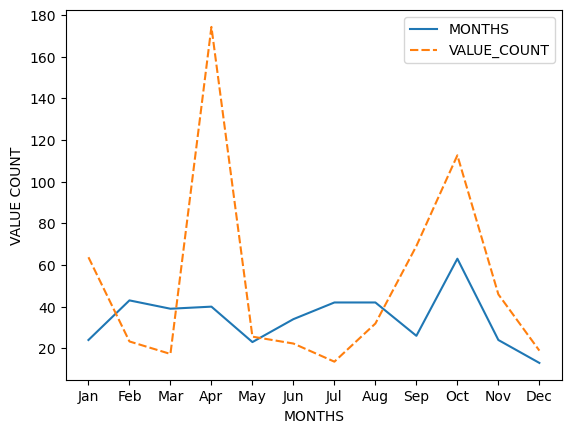

In [33]:
dd = pd.DataFrame({
    'MONTHS':month_counts.values,
    "VALUE_COUNT":df.groupby('MONTH',sort=False)['MILES'].max()
})
p=sns.lineplot(data=dd)
p.set(xlabel='MONTHS',ylabel='VALUE COUNT')

In [34]:
#ON  WHICH DAYS OF THE WEEK DO PEOPLE BOOK UBER RIDES THE MOST
# creting new day column
df['DAY']=df.START_DATE.dt.weekday
day_label={ 0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'
    
}
df['DAY'] = df['DAY'].map(day_label)

In [35]:
df.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY/NIGHT,MONTH_NUM,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,1,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,1,Jan,Sat


Text(0, 0.5, 'COUNT')

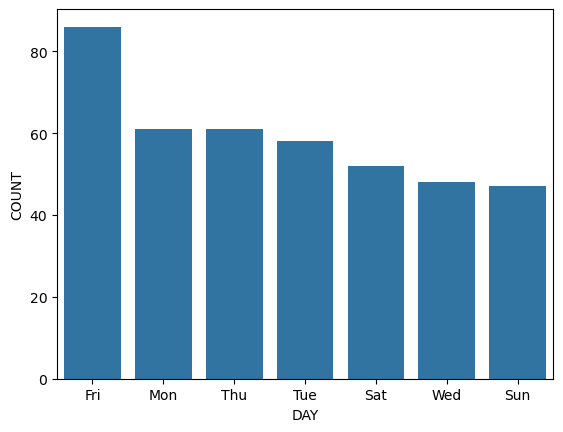

In [37]:
day_label =df.DAY.value_counts()
sns.barplot(x=day_label.index,y=day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')

In [38]:
# HOW MANY MILES DO PEOPLE USUALLY BOOK A CAB FOR THROUGH UBER
df.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY/NIGHT,MONTH_NUM,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,1,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,1,Jan,Sat


<Axes: ylabel='MILES'>

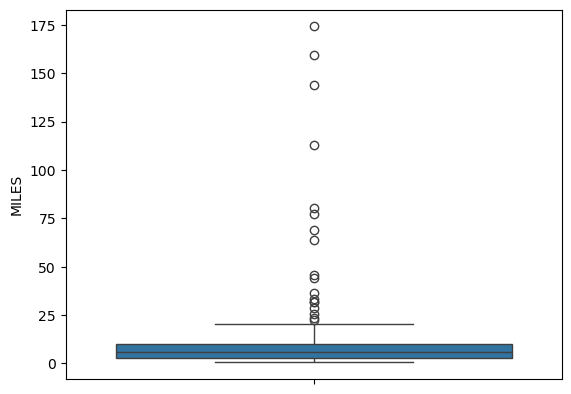

In [39]:
# creting boxplot
sns.boxplot(df['MILES'])

<Axes: ylabel='MILES'>

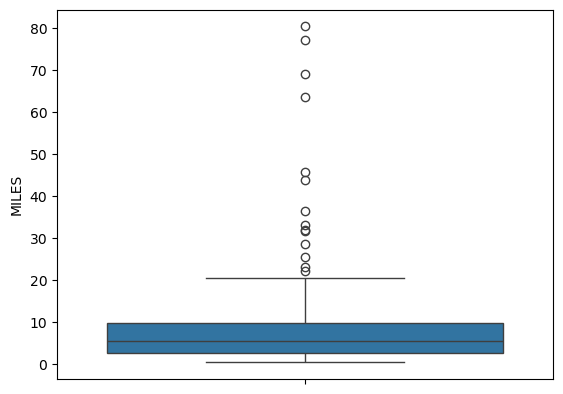

In [40]:
sns.boxplot(df[df['MILES']<100]['MILES'])

<Axes: ylabel='MILES'>

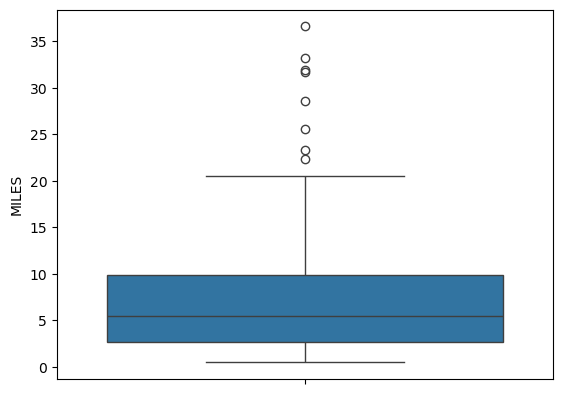

In [42]:
sns.boxplot(df[df['MILES']<=40]['MILES'])

C:\Users\LAKSHMIPRAVEENA\AppData\Local\Temp\ipykernel_25524\344979059.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

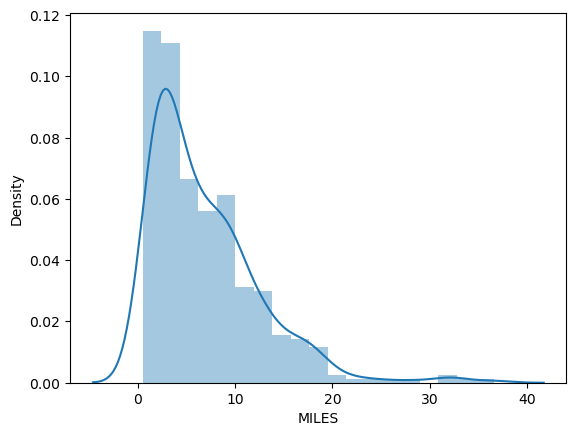

In [43]:
#checking the density
sns.distplot(df[df['MILES']<40]['MILES'])